# What the heck am I doing here: an Overview

The first thing a new reader should do is to review the PDF in the attached git repository.

There are three interesting components to this paper. I've included a quote below

"First we show that for a randomly
initialized neural network with sufficiently many
hidden units, the generic gradient descent algo-
rithm learns any low degree polynomial, assum-
ing we initialize the weights randomly. Secondly,
we show that if we use complex-valued weights
(the target function can still be real), then un-
der suitable conditions, there are no “robust lo-
cal minima”: the neural network can always es-
cape a local minimum by performing a random
perturbation. This property does not hold for
real-valued weights. Thirdly, we discuss whether
sparse polynomials can be learned with small
neural networks, with the size dependent on the
sparsity of the target function." - Learning Polynomials with Neural Networks

The goal of the paper was to present some evidence supporting the effectiveness of neural networks, and I wish to further supplement that evidence by investigating some of their claims in this notebook.

## Result 1

We wish to investigate if, "for a randomly initialized neural network with sufficiently many hidden units, the generic gradient descent algorithm learns any low degree polynomial, assuming we initialize the weights randomly."

The most trivial polynomial is the constant zero. However, trying to verify that a neural network can duplicate this result is like trying to use a flamethrower to light a birthday candle.

Recall the universal approximation theorem: 
https://en.wikipedia.org/wiki/Universal_approximation_theorem

If the function we wish to model is constant, I think it follows trivially from this that a neural network is sufficiently powerful. Specifically, setting all the weights and biases to zero, and using any typical, sigmoidal, activation function should do the trick.

Let's use a slightly less trivial example.

f_1(x) = 2x+1



In [2]:
import numpy as np
import matplotlib.pyplot as plot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers
from keras import losses
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


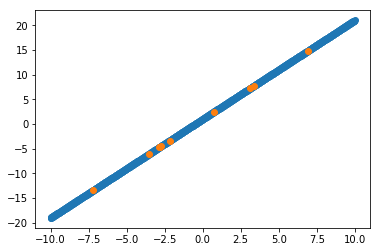

In [3]:
f1 = lambda x: 2*x + 1
xmin = -10
xmax = 10
trainSize = 1000
testSize = 10

def generateSets(f):
    xTrain = np.linspace(xmin,xmax,trainSize)
    yTrain = f(xTrain)
    xTest = np.random.uniform(xmin, xmax, testSize)
    yTest = f(xTest)
    return [[xTrain, yTrain], [xTest, yTest]]

[[x1, y1], [x2, y2]] = generateSets(f1)
plot.scatter(x1,y1)
plot.scatter(x2,y2)
plot.show()

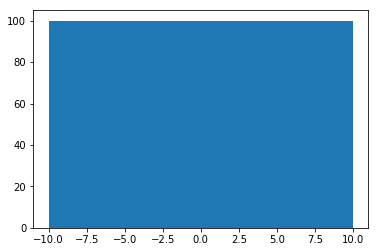

In [4]:
plot.clf()
plot.hist(x1)
plot.show()

In [8]:
model0 = Sequential()
model0.add(Dense(1,input_shape=(1,), kernel_initializer='random_uniform', use_bias=True))
model0.compile(optimizer=optimizers.SGD(), loss=losses.mean_squared_error)
model0.fit(x1,y1)


Epoch 1/10
1000/1000 [==============================] - 0s - loss: 5.2209     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.1405     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.0391     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.0029     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 8.0172e-04     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 2.1849e-04     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 6.0345e-05     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 1.6733e-05     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 4.5597e-06     


As the above model0 shows, stochastic gradient descent can, indeed, learn a linear function when acting upon a peceptron. We proceed.

In [9]:
plot.clf()
model = Sequential()
model.add(Dense(1,input_shape= (1,), kernel_initializer='random_uniform' ,use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(1,kernel_initializer='random_uniform', use_bias=True))
model.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model.fit(x1,y1)

# plot_model(model)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 134.5440     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 134.4312     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 132.5637     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 117.6735     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 74.3082     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 22.7048     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 2.5030     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.2916     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.0972     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.0420     


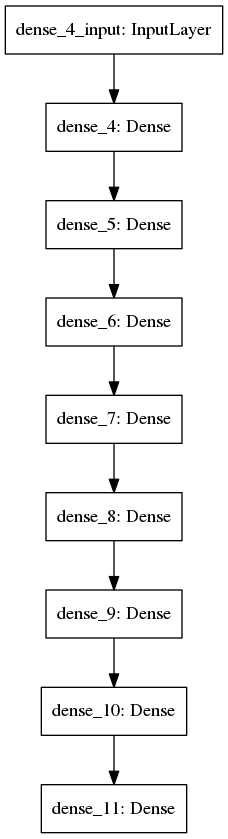

In [10]:
file1 = 'model1.png'
plot_model(model, to_file=file1)
Image(file1)

In [11]:
score = model.evaluate(x2,y2)
print(score)

10/10 [==============================] - 0s
0.0269125904888


Let's try another model

In [18]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,), kernel_initializer='random_uniform', use_bias=True))
model2.add(Dense(1, input_shape=(2,), kernel_initializer='random_uniform', use_bias=True))
model2.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model2.fit(x1,y1)
score2 = model.evaluate(x2,y2)
print(score2)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 132.9031     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 129.6472     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 126.4490     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 123.2609     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 120.1387     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 117.1049     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 114.1299     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 111.2120     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 108.3406     
Epoch 10/10
10/10 [==============================] - 0s
0.0269125904888


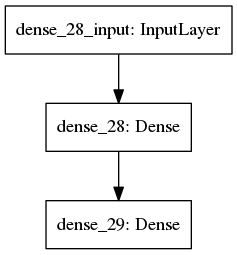

In [38]:
file2 = 'model2.png'
plot_model(model2, to_file=file2)
Image(file2)

Let's see how these models handle a cubic function

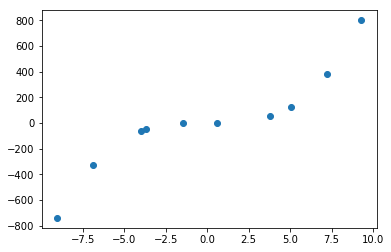

In [19]:
f2 = lambda x: x**3
[[xTrain, yTrain], [xTest, yTest]] = generateSets(f2)
plot.clf()
plot.scatter(xTest,yTest)
plot.show()

In [20]:
model.reset_states()
model.fit(xTrain, yTrain)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 125708.1829     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 104865.9113     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 80769.8179     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 57607.6931     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 39453.1786     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 29387.8822     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 24841.2189     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 23514.7152     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 23143.8593     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 23068.2904     


In [21]:
model1ScoreCubic = model.evaluate(xTest, yTest)
print(model1ScoreCubic)

10/10 [==============================] - 0s
23615.8652344


In [22]:
model2.reset_states()
model2.fit(xTrain, yTrain)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 142505.3119     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 142211.2566     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 141992.5901     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 141805.0518     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 141628.7911     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 141466.0217     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 141309.9460     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 141160.4715     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 141014.0359     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 140874.8535     


In [23]:
model2ScoreCubic = model.evaluate(xTest, yTest)
print(model2ScoreCubic)

10/10 [==============================] - 0s
23615.8652344


# The story so far

Model1 is complex but has a great accuracy. Model2 is simpler with worse accuracy. However, the dilemma is this:
neither are the model that is described in the paper.
Let's proceed by using the specifically defined model from the paper, specifically in Theorem 4.2:

In [49]:
import keras.layers.core
def getModel(layers):
    '''Defines a sequential neural network with the specified number of layers,
    using randomly initialized weights and an exponential activation function'''
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), kernel_initializer='zeros', use_bias=False))
    for i in range(1,layers):
        model.add(Dense(2, kernel_initializer='zeros'))
        model.add(keras.layers.core.Lambda(lambda x: np.e**x))
    m = model.count_params()
    gradientDescent = optimizers.SGD(lr=1/(4*m), )
    model.compile(optimizer=gradientDescent, loss=losses.mean_squared_error)
    return model

testingModel = getModel(3)
testingModel.fit(x1,y1)
testingModelScore = testingModel.evaluate(x2,y2)
print(testingModelScore)

ValueError: Error when checking model target: expected lambda_2 to have shape (None, 2) but got array with shape (1000, 1)